# ANALYSIS OF FUNDING FOR INDIAN STARTUP ECOSYSTEM

### *Overview*
Welcome to the analysis of the Indian startup ecosystem funding data from 2018 to 2021. In this repository, you will find datasets containing details about startups, the funding amounts they received, and information about the investors involved. The objective is to provide a comprehensive understanding of the funding landscape in the Indian startup ecosystem during the specified years.

### *Objectives*
Funding Landscape Exploration: Investigate and understand the funding patterns, trends, and distributions within the Indian startup ecosystem for the specified years.

Sector-wise Analysis: Analyze funding trends across different industry sectors to identify key areas of investment and growth.

Investor Insights: Examine the involvement of investors, both in terms of frequency and amount, to identify influential backers in the startup ecosystem.

Startup Profiling: Profile startups based on their founding years, sectors, and funding stages to gain a holistic view of the evolving entrepreneurial landscape.

Recommendations: Formulate actionable recommendations based on the analysis, guiding the team's strategic approach and potential opportunities within the Indian startup ecosystem.


### *Hypothesis*

Ho (Null Hypothesis): The dominance of the Finance sector significantly influences the overall funding trends across various sectors.

Ha (Alternate Hypothesis): The Finance sector does not have a substantial impact on the overall funding trends across various sectors.

### *Questions* 
1. What are the top 5 regions with the most startups?
2. What are the top 5 sectors by total funding
3. Which Region received the most investment
4. What is the funding trends of startups in Bangalore and Mumbai across different years
5. How has the total investment amount changed over the years?
6. How does the Finance sector compare to the rest of the sectors in funding


## Data  Understanding
### *Data Quality Crisis*
- Missing values
- Undisclosed information
- Duplicate values
- Swapped data between columns

### *Course of action*
- Address any data quality issues
- Correct inaccuracies or errors
- Remove duplicates
- Standardize formats (e.g., date formats)
- Do the currency conversion


#### Connecting to the Database
*Import required libraries*

In [5]:
import pyodbc
from dotenv import dotenv_values  #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import warnings
import io
import requests

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')


*Create a connection by accessing your connection string with your defined environment variables*

In [6]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [7]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [8]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [9]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [10]:
# Sql query to receive data from the table LP1_startup_funding2020
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"

# Sql query to receive data from the table LP1_startup_funding2021
query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

#Execute the SQL queries and load the results into Pandas DataFrames
data_2020 = pd.read_sql(query_2020, connection)

data_2021 = pd.read_sql(query_2021, connection)


In [11]:
# Display the first five rows of 2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [12]:
# Display the first five rows of 2021
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [13]:
# Connectig to the 2019 CSV file
data_2019 = pd.read_csv('data/startup_funding2019.csv')

# Display the first five rows of 2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [14]:
# Fetching 2018 data
url = "https://raw.github.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/master/startup_funding2018.csv"
download = requests.get(url).content
 
 
data_2018 = pd.read_csv(io.StringIO(download.decode('utf-8')))
 
 
# Display the first five rows of 2018
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


## Data Cleaning

#### *Cleaning 2020*

In [15]:
# Assigining a DataFrame
df_2020 = data_2020

# Display the first 5 rows
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


Visualization for the missing data before cleaning

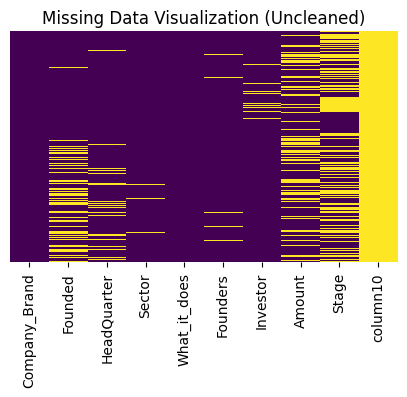

Missing Values Summary:
 Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64


In [16]:
# Check for missing values
missing_values  = df_2020.isnull().sum()

# Visualise missing data
plt.figure(figsize=(5, 3))
sns.heatmap(df_2020.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization (Uncleaned)')
plt.show()

# Display missing values summary
print('Missing Values Summary:\n', missing_values)

In [17]:
# Dropping column 10
df_2020 = df_2020.drop('column10', axis=1)

In [18]:
df_2020.shape

(1055, 9)

In [19]:
df_2020_to_concat = df_2020

Fetch Undisclosed

In [20]:
def fetch_undisclosed_rows(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Convert the column to string and fetch rows where 'Amount' is 'Undisclosed' or 'undisclosed'
    undisclosed_rows = df[df[column_name].astype(str).str.lower() == 'undisclosed']
    return undisclosed_rows

# Example usage:
# Use the fetch_undisclosed_rows function on the 'df_2020' DataFrame
undisclosed_rows2020 = fetch_undisclosed_rows(df_2020)

# Display the fetched rows
undisclosed_rows2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


Dealing with 'Undisclosed' and/ or 'undisclosed' values in 2020

- We delete. This is because the information for amount was not given but it does not mean the company was not funded
- Therefore, we cannot assign it NaN, N/A or 0 values

In [21]:
# Convert 'Amount' column to string and delete rowa where 'Amount' is 'Undisclosed' or 'undisclosed'
df_2020 = df_2020[(df_2020['Amount'].astype(str).str.lower() != 'undiscloded') & (df_2020['Amount'] !='Undisclosed')]

# Display the DataFrame after deleting the rows
print("Any rows whose Amounts column has values 'Undisclosed' and/ or 'undisclosed' has been deleted!")

Any rows whose Amounts column has values 'Undisclosed' and/ or 'undisclosed' has been deleted!


In [22]:
# Showing the datatype
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [23]:
# Checking the frequency count of missing values
df_2020.apply(lambda X:sum(X.isnull()))

Company_Brand      0
Founded          213
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount           254
Stage            464
dtype: int64

In [24]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'

 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df
   

df = pd.DataFrame(df_2020)

 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Call the function to fill null values with 'N/A'
df = fill_null_values(df)

# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 

info = df.info()
 
print("\nDataFrame after processing:")
cleandata_2020=df
cleandata_2020.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1055 non-null   object
 1   Founded        1055 non-null   int32 
 2   HeadQuarter    1055 non-null   object
 3   Sector         1055 non-null   object
 4   What_it_does   1055 non-null   object
 5   Founders       1055 non-null   object
 6   Investor       1055 non-null   object
 7   Amount         1055 non-null   int32 
 8   Stage          1055 non-null   object
dtypes: int32(2), object(7)
memory usage: 66.1+ KB

DataFrame after processing:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,N/A
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,N/A
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,N/A
5,qZense,2019,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000,Seed
6,MyClassboard,2008,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000,Pre-series A
7,Metvy,2018,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,0,Pre-series
8,Rupeek,2015,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000,Series C
9,Gig India,2017,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000,Pre-series A


Visualisation for 2020 data after cleaning

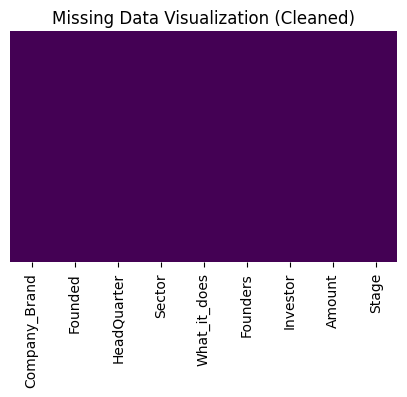

Missing Vslues Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [25]:
# Check for missing values 
missing_values = cleandata_2020.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5,3))
sns.heatmap(cleandata_2020.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization (Cleaned)')
plt.show()

# Display missing values summary
print('Missing Vslues Summary:\n', missing_values)

### *Cleaning 2021*

In [26]:
# Assigining a DataFrame
df_2021 = data_2021

df_2021_to_concat = df_2021

In [27]:
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


Visualization for 2021 data before cleaning

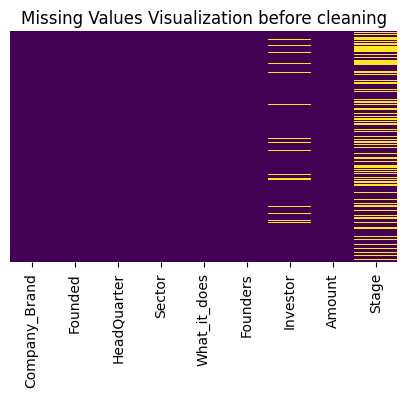

Missing Values Sammary:
 Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64


In [28]:
# Check for missing values
missing_values = df_2021.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(df_2021.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Visualization before cleaning')
plt.show()

# Display missing values summary
print('Missing Values Sammary:\n', missing_values)

In [29]:
# Display the unique values in the 'Investor' column
df_2021['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [30]:
# Display the datatypes
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


Fetch the undisclosed Amount column values in data 2021

In [31]:
# Assuming 'data_df' is the DataFrame with the 'Amount' column
#data2021 = pd.DataFrame(data2021)

def fetch_undisclosed_rows(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Fetch rows where 'Amount' is 'Undisclosed' or 'undisclosed'
    undisclosed_rows = df[df[column_name].str.lower() == 'undisclosed']

    return undisclosed_rows

# Example usage:
# Use the fetch_undisclosed_rows function on the 'data_df' DataFrame
undisclosed_rows2021 = fetch_undisclosed_rows(df_2021)

# Display the fetched rows
undisclosed_rows2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed


In [32]:
undisclosed_rows2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 7 to 853
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  43 non-null     object 
 1   Founded        43 non-null     float64
 2   HeadQuarter    43 non-null     object 
 3   Sector         43 non-null     object 
 4   What_it_does   43 non-null     object 
 5   Founders       43 non-null     object 
 6   Investor       42 non-null     object 
 7   Amount         43 non-null     object 
 8   Stage          27 non-null     object 
dtypes: float64(1), object(8)
memory usage: 3.4+ KB


In [33]:
# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
df_2021 = df_2021[(df_2021['Amount'].astype(str).str.lower() != 'undisclosed') & (df_2021['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
print("DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:")
df_2021.head()

DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [34]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1166 non-null   object 
 1   Founded        1165 non-null   float64
 2   HeadQuarter    1165 non-null   object 
 3   Sector         1166 non-null   object 
 4   What_it_does   1166 non-null   object 
 5   Founders       1162 non-null   object 
 6   Investor       1105 non-null   object 
 7   Amount         1163 non-null   object 
 8   Stage          754 non-null    object 
dtypes: float64(1), object(8)
memory usage: 91.1+ KB


In [35]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$ ,]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df


df = pd.DataFrame(df_2021)
 


# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 
# Call the function to fill null values with 'N/A'
df = fill_null_values(df)

# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 

info = df.info()
 
print("\nDataFrame after processing:")
cleandata_2021=df
cleandata_2021.head()

 



<class 'pandas.core.frame.DataFrame'>
Index: 1166 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1166 non-null   object
 1   Founded        1166 non-null   int32 
 2   HeadQuarter    1166 non-null   object
 3   Sector         1166 non-null   object
 4   What_it_does   1166 non-null   object
 5   Founders       1166 non-null   object
 6   Investor       1166 non-null   object
 7   Amount         1166 non-null   int32 
 8   Stage          1166 non-null   object
dtypes: int32(2), object(7)
memory usage: 114.3+ KB

DataFrame after processing:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXTEntrepreneurFirst,1200000,Pre-seriesA
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",UnilazerVenturesIIFLAssetManagement,120000000,N/A
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSVVenturesWestbridgeCapital,30000000,SeriesD
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDCGroupIDGCapital,51000000,SeriesC
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,LiberathaKallatMukeshYadavDineshNagpal,2000000,Seed


Visualization for 2021 data set after cleaning

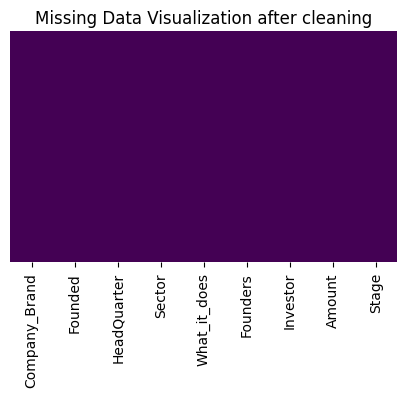

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [36]:
# Check for missing values
missing_values = cleandata_2021.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(cleandata_2021.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization after cleaning')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

### *Cleaning 2019*

In [37]:
# Assigining the DataFrame
df_2019 = data_2019
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


Visualization for 2019 before cleaning

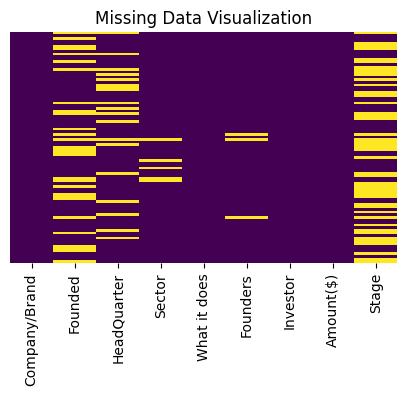

Missing Values Summary:
 Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64


In [38]:
# Check for missing values
missing_values = df_2019.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(df_2019.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [39]:
# Summary of the DataFrame
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


Fetch 'undisclosed' and 'Undisclosed' in the 'Amount' column

In [40]:
# Assuming 'data_df' is the DataFrame with the 'Amount' column
#data2021 = pd.DataFrame(data2021)

def fetch_undisclosed_rows(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount($)'

    # Fetch rows where 'Amount' is 'Undisclosed' or 'undisclosed'
    undisclosed_rows = df[df[column_name].str.lower() == 'undisclosed']

    return undisclosed_rows

# Example usage:
# Use the fetch_undisclosed_rows function on the 'data_df' DataFrame
undisclosed_rows2019 = fetch_undisclosed_rows(df_2019)

# Display the fetched rows
undisclosed_rows2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,NaN
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,NaN
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A


In [41]:
# Rename the 'Amount($)' to 'Amount'
undisclosed_rows2019 = undisclosed_rows2019.rename(columns={'Amount($)': 'Amount', 'Company/Brand': 'Company_Brand', 'What it does': 'What_it_does'})

In [42]:
undisclosed_rows2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 5 to 75
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  12 non-null     object 
 1   Founded        8 non-null      float64
 2   HeadQuarter    9 non-null      object 
 3   Sector         12 non-null     object 
 4   What_it_does   12 non-null     object 
 5   Founders       12 non-null     object 
 6   Investor       12 non-null     object 
 7   Amount         12 non-null     object 
 8   Stage          3 non-null      object 
dtypes: float64(1), object(8)
memory usage: 960.0+ bytes


In [43]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [44]:
# Rename the 'Amount($)' to 'Amount'
df_2019.rename(columns={'Amount($)': 'Amount','Company/Brand':'Company_Brand','What it does': 'What_it_does'}, inplace=True)

# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
df_2019 = df_2019[(df_2019['Amount'].astype(str).str.lower() != 'undisclosed') & (df_2019['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
print("DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:")
df_2019.head()

DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [45]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df

def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\$ ,]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df

df = pd.DataFrame(df_2019)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')

# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)
 
# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)
 

# Call the function to fill null values with 'N/A'
df = fill_null_values(df)

# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 

info = df.info()
 
print("\nDataFrame after processing:")
cleandata_2019=df
cleandata_2019.head()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  77 non-null     object
 1   Founded        77 non-null     int32 
 2   HeadQuarter    77 non-null     object
 3   Sector         77 non-null     object
 4   What_it_does   77 non-null     object
 5   Founders       77 non-null     object
 6   Investor       77 non-null     object
 7   Amount         77 non-null     int32 
 8   Stage          77 non-null     object
dtypes: int32(2), object(7)
memory usage: 5.4+ KB

DataFrame after processing:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,0,N/A,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,SixthSenseVentures,6300000,N/A
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",GeneralAtlantic,150000000,SeriesC
2,Eduisfun,0,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,DeepakParekhAmitabhBachchanPiyushPandey,28000000,Freshfunding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath",EvolvenceIndiaFund(EIF)PidiliteGroupFJLabs,30000000,SeriesD
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,InnovationinFoodandAgriculture(IFA),6000000,N/A


Visualization for 2019 data after cleaning

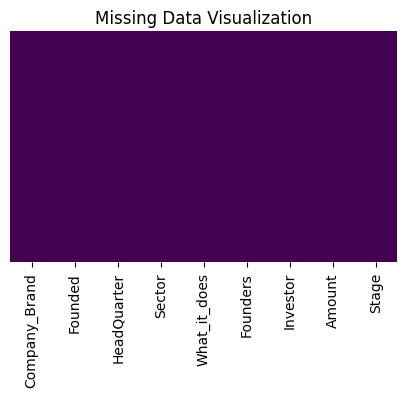

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [46]:
# Check for missing values
missing_values = cleandata_2019.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(cleandata_2019.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

### *Cleaning 2018*

In [47]:
# Assigning the DataFrame
df_2018 = data_2018
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


Visualization for the 2018 data before cleaning

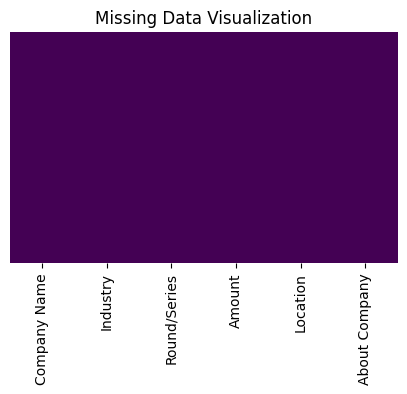

Missing Values Summary:
 Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64


In [48]:
# Check for missing values
missing_values = df_2018.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(df_2018.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

Fetch 'undisclosed' & 'Undisclosed' in the 'Amount' column

In [49]:
def fetch_undisclosed_rows(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Convert the column to string and fetch rows where 'Amount' is 'Undisclosed' or 'undisclosed'
    undisclosed_rows = df[df[column_name].astype(str).str.lower() == 'undisclosed']

    return undisclosed_rows

# Example usage:
# Use the fetch_undisclosed_rows function on the 'df_2018' DataFrame
undisclosed_rows2018 = fetch_undisclosed_rows(df_2018)

# Display the fetched rows
undisclosed_rows2018.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Company Name, Industry, Round/Series, Amount, Location, About Company]
Index: []>

In [50]:
#Processing Amount column data2018
#Converting Rupee to dollars


def replace_missing_values(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Replace '—' and NaN values with 0
    df[column_name] = df[column_name].replace(['—', pd.NA], 0)

    return df

def add_currency_sign(df):
    # Assuming 'Amount' is the column containing numeric values
    column_name = 'Amount'

    # Identify numeric values in the 'Amount' column
    numeric_values = pd.to_numeric(df[column_name], errors='coerce').notna()

    # Identify values with existing currency signs
    skip_values = df[column_name].astype(str).str.contains('[$₹]')

    # Add dollar sign to numeric values without existing currency signs
    df.loc[numeric_values & ~skip_values, column_name] = df.loc[numeric_values & ~skip_values, column_name].apply(lambda x: f'${x}' if pd.notna(x) else x)

    return df




def convert_rupees_to_dollars(df):
    # Assuming 'Amount' is the column containing values in rupees (₹)
    column_name = 'Amount'

    # Exchange rate from rupees to dollars
    exchange_rate = 0.0146   # Adjust this value based on the current exchange rate

    # Convert values to dollars and add dollar sign
    df[column_name] = df[column_name].apply(lambda x: f'${float(x.replace(",", "")[1:]) * exchange_rate}' if isinstance(x, str) and '₹' in x else x)

    return df



def add_dollar_sign(df):
    # Assuming 'Amount' is the column containing numerical values
    column_name = 'Amount'

    # Identify values with a dollar sign
    dollar_values = df[column_name].astype(str).str.contains('\$')

    # Add dollar sign to values without an existing dollar sign
    df.loc[~dollar_values, column_name] = df.loc[~dollar_values, column_name].apply(lambda x: f'${x}' if pd.notnull(x) else x)

    return df




def strip_dollar_and_comma(df):
    # Assuming 'Amount' is the column containing numerical values
    column_name = 'Amount'

    # Strip dollar signs and commas from the values in 'Amount' column
    df[column_name] = df[column_name].astype(str).replace('[\$,]', '', regex=True)

    return df

def convert_float_to_integer(df):
    # Assuming 'Amount' is the column containing numerical values
    column_name = 'Amount'

    # Convert float values to integers in the 'Amount' column
    df[column_name] = df[column_name].apply(lambda x: int(x) if pd.notnull(x) and isinstance(x, float) else x)

    return df

# Additional function to remove decimal for ".0" values
def remove_decimal(df):
    # Assuming 'Amount' is the column containing numerical values
    column_name = 'Amount'

    # Convert ".0" values to integers in the 'Amount' column
    df[column_name] = df[column_name].apply(lambda x: int(x) if pd.notnull(x) and isinstance(x, float) and x.is_integer() else x)

    return df

def strip_decimals(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Strip decimals from string values in the 'Amount' column
    df[column_name] = df[column_name].apply(lambda x: str(int(float(x))) if isinstance(x, str) and '.' in x else x)

    return df




def convert_to_integer(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Convert string values to integers in the 'Amount' column
    df[column_name] = pd.to_numeric(df[column_name].astype(str).str.replace('[^\d]', ''), errors='coerce').fillna(0).astype(int)

    return df



df = pd.DataFrame(df_2018)

# Replace missing values
df = replace_missing_values(df)

# Add currency sign to numeric values
df = add_currency_sign(df)

# Convert rupees to dollars and add dollar sign
df = convert_rupees_to_dollars(df)

# Add dollar sign to values in the 'Amount' column
df = add_dollar_sign(df)

# Strip dollar signs and commas from values in the 'Amount' column
df = strip_dollar_and_comma(df)


df = convert_float_to_integer(df)

# Remove decimal for ".0" values in the 'Amount' column
df = remove_decimal(df)

# Display the updated DataFrame
#print(df)

df = strip_decimals(df)



# Convert string values to integers in the 'Amount' column
df = convert_to_integer(df)

# Display the updated DataFrame
df_2018 = df
df_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,0,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,511000,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [51]:
# Convert 'Amount' column to string and delete rows where 'Amount' is "Undisclosed" or "undisclosed"
df_2018 = df_2018[(df_2018['Amount'].astype(str).str.lower() != 'undisclosed') & (df_2018['Amount'] != 'Undisclosed')]

# Display the DataFrame after deleting the rows
print("DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:")
df_2018.head()

DataFrame after deleting rows with 'Undisclosed' or 'undisclosed' in 'Amount' column:


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [52]:
new_names = {'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What_it_does'}
df = df_2018.rename(columns=new_names)
df.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [53]:
# Add new columns with NaN values

df['Founded'] = 0
df['Founders'] = 'N/A'
df['Investor'] = 'N/A'

In [54]:
# Rearrange columns
columns_order = ['Company_Brand','Founded', 'HeadQuarter', 'Sector','What_it_does','Founders','Investor','Amount','Stage']

df = df.reindex(columns=columns_order)

df_2018 = df
#data2018_to_concat = df_2018
#data2018_to_concat

In [55]:
df_2018.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  526 non-null    object
 1   Founded        526 non-null    int64 
 2   HeadQuarter    526 non-null    object
 3   Sector         526 non-null    object
 4   What_it_does   526 non-null    object
 5   Founders       526 non-null    object
 6   Investor       526 non-null    object
 7   Amount         526 non-null    int32 
 8   Stage          526 non-null    object
dtypes: int32(1), int64(1), object(7)
memory usage: 35.1+ KB


Visualization for 2018 dataset after adding a new column

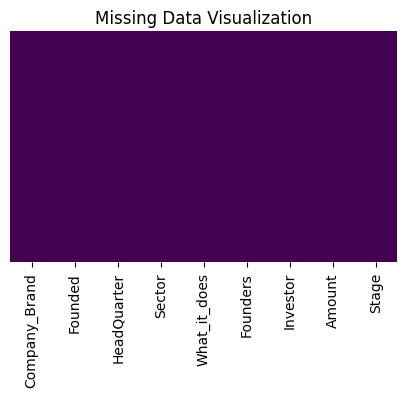

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [56]:
# Check for missing values
missing_values = df_2018.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(df_2018.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

Cleaning the whole dataset after rearranging the columns,inserting the columns and filling the inserted columns with n/a and 0

In [57]:
def swap_non_numeric_with_numeric(df):
    amounts_column = 'Amount'
    stage_column = 'Stage'
    investor_column = 'Investor'
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Function to find numeric values in 'Stage' column
    def find_numeric_values():
        numeric_dict = {}
        for index, value in df[stage_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values()
 
    # Find numeric values in 'Stage' column
    numeric_values = find_numeric_values()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Stage'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Stage' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, stage_column] = non_numeric_values[index]
 
    # Function to find numeric values in 'Investor' column
    def find_numeric_values_founders():
        numeric_dict = {}
        for index, value in df[investor_column].items():
            try:
                numeric_dict[index] = pd.to_numeric(value)
            except ValueError:
                pass  # Ignore non-numeric values
        return numeric_dict
 
    # Function to find non-numeric values in 'Amounts' column
    def find_non_numeric_values_founders():
        non_numeric_dict = {}
        for index, value in df[amounts_column].items():
            try:
                pd.to_numeric(value)
            except ValueError:
                non_numeric_dict[index] = value
        return non_numeric_dict
 
    # Find non-numeric values in 'Amounts' column
    non_numeric_values = find_non_numeric_values_founders()
 
    # Find numeric values in 'Founders' column
    numeric_values = find_numeric_values_founders()
 
    # Swap non-numeric values in 'Amounts' with numeric values in 'Founders'
    for index, non_numeric_value in non_numeric_values.items():
        if index in numeric_values:
            df.at[index, amounts_column] = numeric_values[index]
 
    # Swap numeric values in 'Founders' with non-numeric values in 'Amounts'
    for index, numeric_value in numeric_values.items():
        if index in non_numeric_values:
            df.at[index, investor_column] = non_numeric_values[index]
 
    return df
 
 
def strip_dollar_and_comma(df):
    # Assuming column names are 'Amounts' and 'Stage'
    numeric_columns = ['Investor', 'Amount', 'Stage']
 
    # Iterate through numeric columns and strip dollar sign ($) and comma (,)
    for column in numeric_columns:
        df[column] = df[column].replace('[\₹ ,]', '', regex=True)
 
    return df
 
 
def replace_non_numeric_with_zero(df):
    # Assuming column name is 'Amounts'
    amounts_column = 'Amount'
    # Replace non-numeric values in 'Amounts' column with 0
    df[amounts_column] = pd.to_numeric(df[amounts_column], errors='coerce').fillna(0).astype(int)
 
    return df


def fill_null_values(df):
    # Specify the columns to fill with 'N/A'
    columns_to_fill_na = ['HeadQuarter', 'Investor', 'Stage','Sector']
 
    # Fill null values in specified columns with 'N/A'
    df[columns_to_fill_na] = df[columns_to_fill_na].fillna('N/A')

    # Fill null values in 'Founded' with 0   
    df['Founded'] = df['Founded'].fillna(0)

    # Convert 'Founded' values to integers    
    df['Founded'] = df['Founded'].astype(int)
 
    return df



df = pd.DataFrame(df_2018)
 
# Call the function to replace NaN values in 'Founders' with "N/A"
df['Founders'] = df['Founders'].fillna('N/A')
 
# Call the function to strip dollar sign and comma from numeric values
df = strip_dollar_and_comma(df)

# Call the function to swap non-numeric with numeric values
df = swap_non_numeric_with_numeric(df)
 
# Call the function to swap numeric with non-numeric values in 'Founders'
df = swap_non_numeric_with_numeric(df)

df = fill_null_values(df)
 
# Call the function to replace non-numeric values in 'Amounts' with 0
df = replace_non_numeric_with_zero(df)

# Call the function to fill null values in  'Founded' with 0
df = fill_null_values(df) 

df.info() 

print("\nDataFrame after processing:")
cleandata_2018=df
cleandata_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  526 non-null    object
 1   Founded        526 non-null    int32 
 2   HeadQuarter    526 non-null    object
 3   Sector         526 non-null    object
 4   What_it_does   526 non-null    object
 5   Founders       526 non-null    object
 6   Investor       526 non-null    object
 7   Amount         526 non-null    int32 
 8   Stage          526 non-null    object
dtypes: int32(2), object(7)
memory usage: 33.0+ KB

DataFrame after processing:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,TheCollegeFever,0,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...","TheCollegeFever is a hub for fun, fiesta and f...",N/A,N/A,250000,Seed
1,Happy Cow Dairy,0,"Mumbai, Maharashtra, India","Agriculture, Farming",A startup which aggregates milk from dairy far...,N/A,N/A,584000,Seed
2,MyLoanCare,0,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",Leading Online Loans Marketplace in India,N/A,N/A,949000,SeriesA
3,PayMe India,0,"Noida, Uttar Pradesh, India","Financial Services, FinTech",PayMe India is an innovative FinTech organizat...,N/A,N/A,2000000,Angel
4,Eunimart,0,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",Eunimart is a one stop solution for merchants ...,N/A,N/A,0,Seed


Visualization for 2018 dataset after cleaning

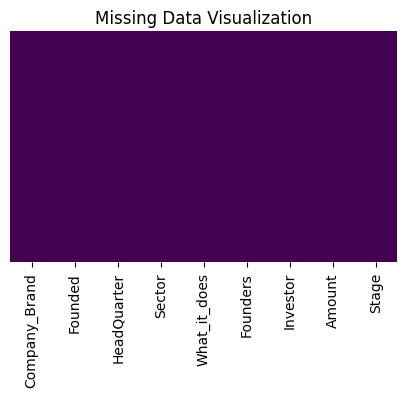

Missing Values Summary:
 Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64


In [58]:
# Check for missing values
missing_values = cleandata_2018.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(cleandata_2018.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [59]:
cleandata_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  526 non-null    object
 1   Founded        526 non-null    int32 
 2   HeadQuarter    526 non-null    object
 3   Sector         526 non-null    object
 4   What_it_does   526 non-null    object
 5   Founders       526 non-null    object
 6   Investor       526 non-null    object
 7   Amount         526 non-null    int32 
 8   Stage          526 non-null    object
dtypes: int32(2), object(7)
memory usage: 33.0+ KB


In [60]:
# Add a column indicating the year data was collected 
cleandata_2021['Year_data_collected'] = '2021'
cleandata_2020['Year_data_collected'] = '2020'
cleandata_2019['Year_data_collected'] = '2019'
cleandata_2018['Year_data_collected'] = '2018'

# Concatenate the DataFrames vertically
full_data = pd.concat([cleandata_2021, cleandata_2020,cleandata_2019,cleandata_2018], ignore_index=True)

# Display the concatenated DataFrame
print("Concatenated DataFrame:")
full_data

Concatenated DataFrame:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year_data_collected
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXTEntrepreneurFirst,1200000,Pre-seriesA,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",UnilazerVenturesIIFLAssetManagement,120000000,N/A,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSVVenturesWestbridgeCapital,30000000,SeriesD,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDCGroupIDGCapital,51000000,SeriesC,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,LiberathaKallatMukeshYadavDineshNagpal,2000000,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
2819,Udaan,0,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",N/A,N/A,225000000,SeriesC,2018
2820,Happyeasygo Group,0,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,N/A,N/A,0,SeriesA,2018
2821,Mombay,0,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,N/A,N/A,7500,Seed,2018
2822,Droni Tech,0,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,N/A,N/A,511000,Seed,2018


In [61]:
full_data.shape

(2824, 10)

In [62]:
# Check for duplicate entries
print("\nDuplicate Entries:", full_data.duplicated().sum())

# Drop duplicates if necessary
full_data.drop_duplicates(inplace=True)


Duplicate Entries: 23


In [63]:
full_data.shape

(2801, 10)

In [64]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2801 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company_Brand        2801 non-null   object
 1   Founded              2801 non-null   int32 
 2   HeadQuarter          2801 non-null   object
 3   Sector               2801 non-null   object
 4   What_it_does         2801 non-null   object
 5   Founders             2801 non-null   object
 6   Investor             2801 non-null   object
 7   Amount               2801 non-null   int32 
 8   Stage                2801 non-null   object
 9   Year_data_collected  2801 non-null   object
dtypes: int32(2), object(8)
memory usage: 218.8+ KB


Visualization for full data after cleaning

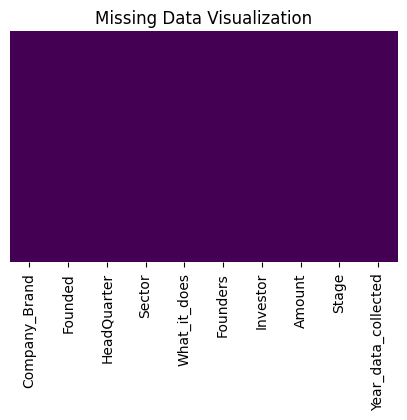

Missing Values Summary:
 Company_Brand          0
Founded                0
HeadQuarter            0
Sector                 0
What_it_does           0
Founders               0
Investor               0
Amount                 0
Stage                  0
Year_data_collected    0
dtype: int64


In [65]:
# Check for missing values
missing_values = full_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(full_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [66]:
def remove_negative_sign(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Convert the 'Amount' column to strings and then remove negative signs
    df[column_name] = df[column_name].astype(str).str.replace('-', '')

    return df



def convert_to_integer(df):
    # Assuming 'Amount' is the column containing values
    column_name = 'Amount'

    # Convert the 'Amount' column to integers
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')

    return df




def convert_year_to_integer(df):
    # Assuming 'Year_data_collected' is the column containing values
    column_name = 'Year_data_collected'

    # Convert the 'Year_data_collected' column to integers
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce').astype('Int64')

    return df


# Example usage:
# Use the remove_negative_sign function on the 'full_data' dataset
full_data = remove_negative_sign(full_data)

# Example usage:
# Use the convert_to_integer function on the 'full_data' dataset
full_data = convert_to_integer(full_data)

# Use the convert_year_to_integer function on the 'full_data' dataset
full_data = convert_year_to_integer(full_data)


# Display the updated DataFrame
full_data['Amount']

0         1200000
1       120000000
2        30000000
3        51000000
4         2000000
          ...    
2819    225000000
2820            0
2821         7500
2822       511000
2823     35000000
Name: Amount, Length: 2801, dtype: Int64

In [67]:
#replaces 0 values in Founded column with median

def replace_zero_with_median(df):
    # Replace 0 values in 'Founded' with the median
    df['Founded'] = df['Founded'].replace(0, df['Founded'].median())

    return df

# Example usage:
# Assuming 'your_dataset' is your DataFrame
full_data = replace_zero_with_median(full_data)
# Display the updated dataset
full_data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year_data_collected
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXTEntrepreneurFirst,1200000,Pre-seriesA,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",UnilazerVenturesIIFLAssetManagement,120000000,N/A,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSVVenturesWestbridgeCapital,30000000,SeriesD,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDCGroupIDGCapital,51000000,SeriesC,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,LiberathaKallatMukeshYadavDineshNagpal,2000000,Seed,2021


In [68]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2801 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company_Brand        2801 non-null   object
 1   Founded              2801 non-null   int32 
 2   HeadQuarter          2801 non-null   object
 3   Sector               2801 non-null   object
 4   What_it_does         2801 non-null   object
 5   Founders             2801 non-null   object
 6   Investor             2801 non-null   object
 7   Amount               2801 non-null   Int64 
 8   Stage                2801 non-null   object
 9   Year_data_collected  2801 non-null   Int64 
dtypes: Int64(2), int32(1), object(7)
memory usage: 235.2+ KB


Full Undisclose data

In [69]:
# Add a column indicating the year data was collected 
undisclosed_rows2021['Year_data_collected'] = '2021'
#undisclosed_rows2020['Year_data_collected'] = '2020'
undisclosed_rows2019['Year_data_collected'] = '2019'
#undisclosed_rows2018['Year_data_collected'] = '2018'

# Concatenate the DataFrames vertically
full_undisclosed_data = pd.concat([undisclosed_rows2021,undisclosed_rows2019], ignore_index=True)

# Display the concatenated DataFrame
print("Concatenated DataFrame:")
full_undisclosed_data.head()

Concatenated DataFrame:


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year_data_collected
0,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
1,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
2,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
3,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
4,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021


In [70]:
full_undisclosed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company_Brand        55 non-null     object 
 1   Founded              51 non-null     float64
 2   HeadQuarter          52 non-null     object 
 3   Sector               55 non-null     object 
 4   What_it_does         55 non-null     object 
 5   Founders             55 non-null     object 
 6   Investor             54 non-null     object 
 7   Amount               55 non-null     object 
 8   Stage                30 non-null     object 
 9   Year_data_collected  55 non-null     object 
dtypes: float64(1), object(9)
memory usage: 4.4+ KB


Visualiztion for undisclosed before cleaning

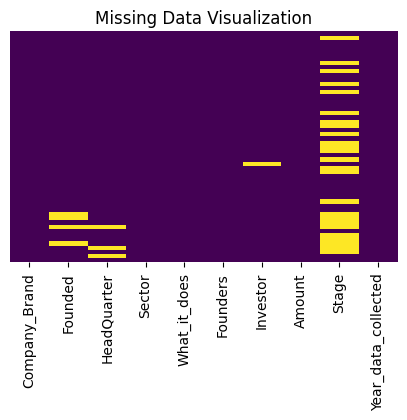

Missing Values Summary:
 Company_Brand           0
Founded                 4
HeadQuarter             3
Sector                  0
What_it_does            0
Founders                0
Investor                1
Amount                  0
Stage                  25
Year_data_collected     0
dtype: int64


In [71]:
# Check for missing values
missing_values = full_undisclosed_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(full_undisclosed_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [72]:
def clean_missing_values(df):
    # Fill missing values in 'Founded' and 'HeadQuarter' columns with appropriate values
    df['Founded'] = df['Founded'].fillna(df['Founded'].median())
    df['HeadQuarter'] = df['HeadQuarter'].fillna('Unknown')

    # For 'Investor' column, fill missing values with 'Undisclosed'
    df['Investor'] = df['Investor'].fillna('Undisclosed')

    # For 'Stage' column, fill missing values with the most frequent stage
    most_frequent_stage = df['Stage'].mode().iloc[0]
    df['Stage'] = df['Stage'].fillna(most_frequent_stage)

    return df



def convert_year_to_integer(df):
    # Convert 'Year_data_collected' column to integer
    df['Year_data_collected'] = df['Year_data_collected'].astype(int)

    return df

# Example usage:
# Assuming you have a DataFrame 'your_data'
clean_undisclosed_data = clean_missing_values(full_undisclosed_data)
#clean_undisclosed_data = strip_dollar_sign_and_comma(clean_undisclosed_data)
clean_undisclosed_data = convert_year_to_integer(clean_undisclosed_data)

# Display the cleaned DataFrame
clean_undisclosed_data.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year_data_collected
0,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
1,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,Seed,2021
2,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
3,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
4,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021


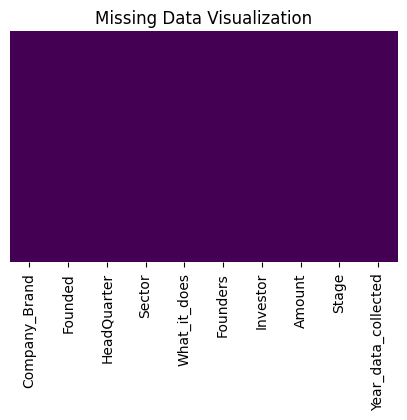

Missing Values Summary:
 Company_Brand          0
Founded                0
HeadQuarter            0
Sector                 0
What_it_does           0
Founders               0
Investor               0
Amount                 0
Stage                  0
Year_data_collected    0
dtype: int64


In [73]:
# Check for missing values
missing_values = clean_undisclosed_data.isnull().sum()

# Visualize missing data
plt.figure(figsize=(5, 3))
sns.heatmap(clean_undisclosed_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Display missing values summary
print("Missing Values Summary:\n", missing_values)

In [74]:
clean_undisclosed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company_Brand        55 non-null     object 
 1   Founded              55 non-null     float64
 2   HeadQuarter          55 non-null     object 
 3   Sector               55 non-null     object 
 4   What_it_does         55 non-null     object 
 5   Founders             55 non-null     object 
 6   Investor             55 non-null     object 
 7   Amount               55 non-null     object 
 8   Stage                55 non-null     object 
 9   Year_data_collected  55 non-null     int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 4.2+ KB


In [75]:
full_data['HeadQuarter'] = full_data['HeadQuarter'].str.split(',').str[0]

In [76]:
# Grouping by a single column
grouped_single = df.groupby('HeadQuarter')

Export the concatinated dataset to csv

In [77]:
# Convert the full dataset to csv
full_data.to_csv('Ecosystem_Data.csv')

## Explorative Data Analysis

### *Summary statistics*

In [78]:
full_data.describe().round(0)

,Founded,Amount,Year_data_collected
count,2801.0,2801.0,2801.0
mean,2016.0,22487767.0,2020.0
std,4.0,105835814.0,1.0
min,1963.0,0.0,2018.0
25%,2015.0,260000.0,2020.0
50%,2015.0,1700000.0,2020.0
75%,2018.0,8468000.0,2021.0
max,2021.0,2147483648.0,2021.0


### *Observation*
- The mean Amount funded was 22487767.073545
- The Maximum funding was 2147483648.0
- Some companies were not funded at all

### *Correlation matrix*

In [79]:
# Select only numeric columns (float64 and int64) from the DataFrame
numeric_columns = full_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = df[numeric_columns].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix #display the matrix


Correlation Matrix:


,Amount,Year_data_collected
Amount,1.0,NaN
Year_data_collected,NaN,NaN


### *Observation*
- Year_data_collected vs. Amount:
- The correlation between "Year_data_collected" and "Amount" is marked as NaN (Not a Number). This shows that there is  no numeric correlation between the two variables.

## Univariate Analysis

### *Analysis of the Amount attribute*

In [80]:
# calculate basic statistical measures
mean = full_data['Amount'].mean()
median = full_data['Amount'].median()
mode = full_data['Amount'].mode()
std_dev = full_data['Amount'].std()
min_val = full_data['Amount'].min()
max_val = full_data['Amount'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)

Mean:  22487767.07354516
Median:  1700000.0
Mode:  0    0
Name: Amount, dtype: Int64
Standard Deviation:  105835813.85516754
Minimum Value:  0
Maximum Value:  2147483648


The histogram of the Amount attribute is visualized below;

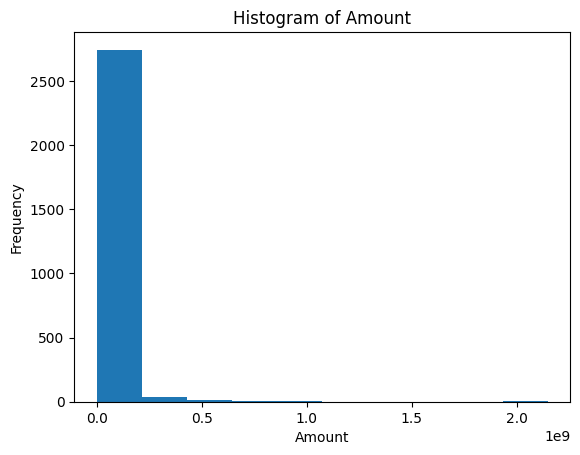

In [81]:
# create a histogram
plt.hist(full_data['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()

The distribution plot shows the skewness of the Amount attribute of the dataset.

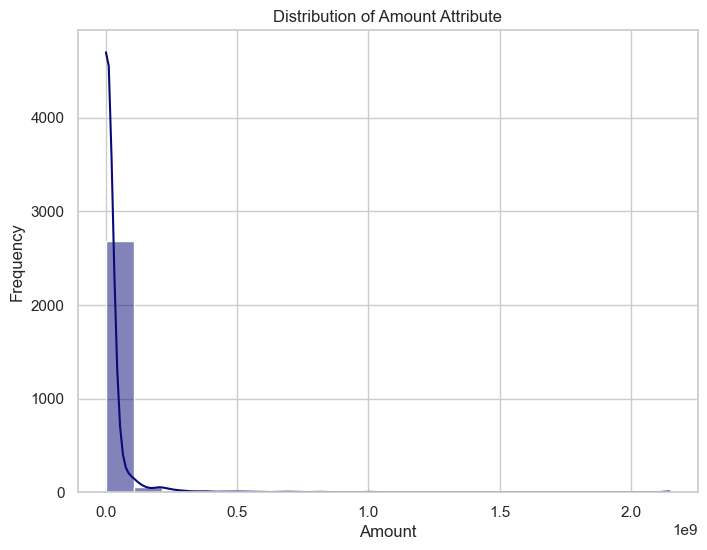

In [82]:
full_data = pd.DataFrame(full_data)

# Create a distribution plot for the 'Amount' attribute
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(full_data['Amount'], kde=True, color='#090979', bins=20)
plt.title('Distribution of Amount Attribute')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

The box plot visualization of the amounts column

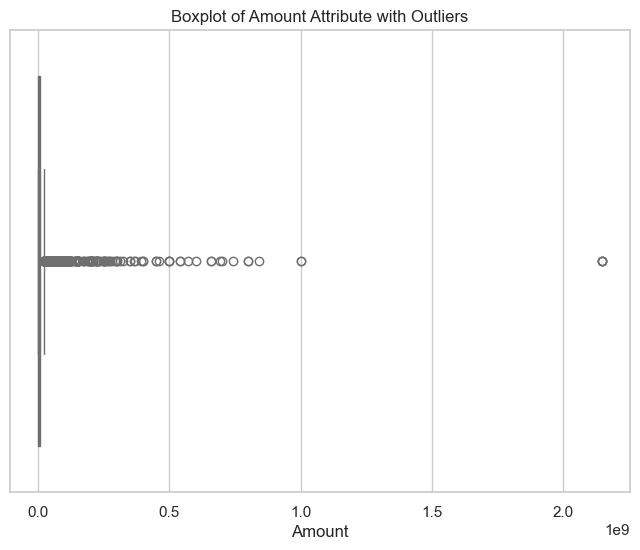

In [83]:
full_data = pd.DataFrame(full_data)

# Create a boxplot for the 'Amount' attribute
plt.figure(figsize=(8, 6))
sns.boxplot(x=full_data['Amount'], color='skyblue')
plt.title('Boxplot of Amount Attribute with Outliers')
plt.xlabel('Amount')
plt.show()

The boxplot figure revealed that the Amount column had a few outliers.

## Multiveriate Analysis

### *Exploring Relationships*

What is the relationship between Funding and the year Founded

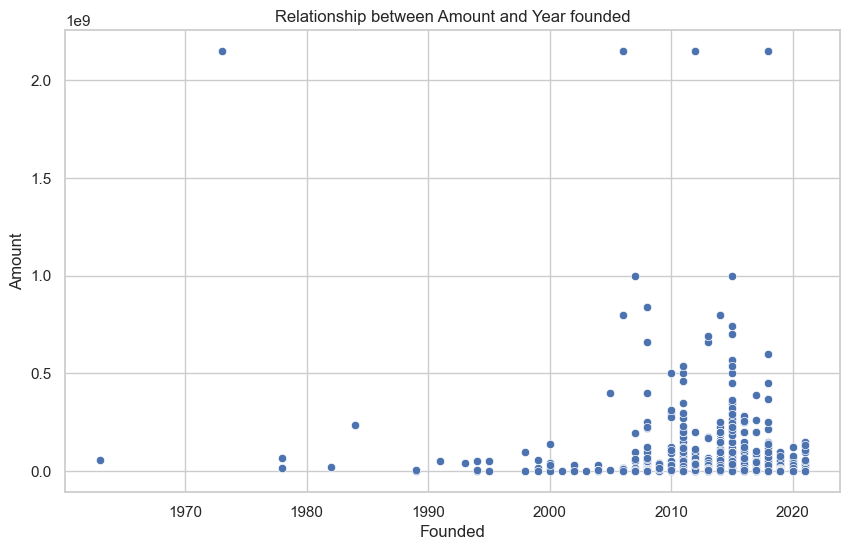

In [84]:
# Visualize the relationship between 'Amount' and 'Founded'


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Founded', y='Amount', data=full_data)
plt.title('Relationship between Amount and Year founded')
plt.xlabel('Founded')
plt.ylabel('Amount')
plt.show()

Which year has the highest amount of investment?

- Annual Investment Overview

In [85]:
# Example DataFrame creation
data = full_data

df = pd.DataFrame(data)

# Group by 'Year_data_collected' and calculate the mean of 'Amount'
mean_amount_by_year = df.groupby('Year_data_collected')['Amount'].mean()

# Display the result
mean_amount_by_year

Year_data_collected
2018    12650520.337143
2019    43330301.298701
2020    20236948.239544
2021    27655631.776809
Name: Amount, dtype: Float64

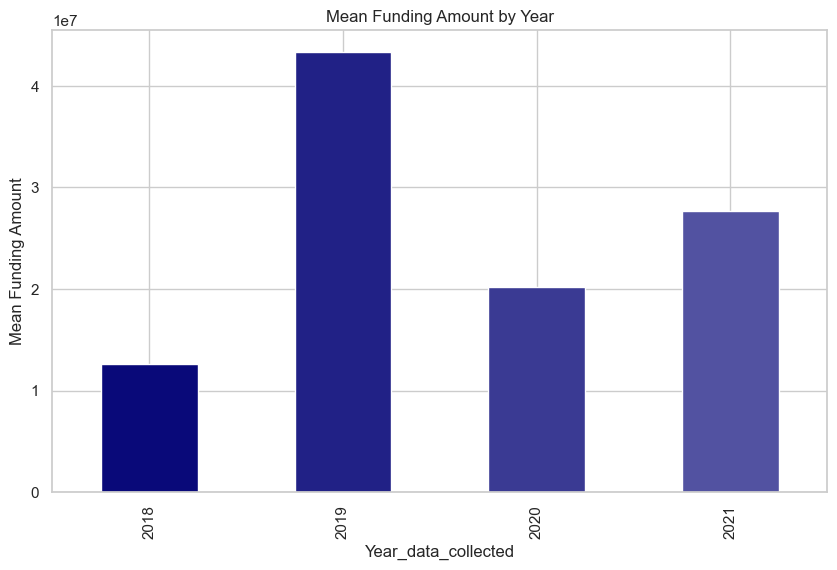

In [86]:
# Example DataFrame creation
data = full_data
df = pd.DataFrame(data)

# Group by 'Year_data_collected' and calculate the mean of 'Amount'
mean_amount_by_year = df.groupby('Year_data_collected')['Amount'].mean()

# Sort the result in descending order
mean_amount_by_year = mean_amount_by_year
#.sort_values(ascending=False)

# Define a color palette for the bars
#colors = ['skyblue' for _ in range(len(mean_amount_by_year))]
# Custom color palette for the bar graph
colors = ['#090979', '#212186', '#3a3a93', '#5252a1']
# colors = ["#090979", "#212186", "#3a3a93", "#5252a1", "#6b6bae" ]

# Plotting the result using a bar chart with added colors
plt.figure(figsize=(10, 6))
mean_amount_by_year.plot(kind='bar', color=colors)
plt.xlabel('Year_data_collected')
plt.ylabel('Mean Funding Amount')
plt.title('Mean Funding Amount by Year')
plt.show()

#### Observations
* 2019 stood out in terms of investment. This insight is helpful to stakeholders seeking to understand the market's historical peaks and strategize accordingly.

#### Grouped Sector/Amount Data

In [87]:
full_data = pd.DataFrame(full_data)

# Define a mapping dictionary for sector grouping
sector_mapping = {
    'FinTech': 'Finance',
    'EdTech': 'Education',
    'E-commerce': 'Retail',
    'Tech company': 'Technology',
    'Edtech': 'Education',
    'Multinational conglomerate company': 'Conglomerate',
    'Automotive': 'Automotive',
    'Financial Services': 'Finance',
    'Hospitality': 'Hospitality',
    'Insurance': 'Finance',
    'Food Delivery, Food Processing, Internet': 'Food & Internet',
    'Innovation Management': 'Innovation',
    'Fintech': 'Finance',
    'Sports': 'Sports'
}

# Map the sectors based on the dictionary
full_data['Grouped_Sector'] = full_data['Sector'].map(sector_mapping)

# Group by the new grouped sector column and sum the amounts
grouped_data = full_data.groupby('Grouped_Sector')['Amount'].sum()

# Print the grouped and aggregated data
grouped_data

Grouped_Sector
Automotive         1961941000
Conglomerate       2147483648
Education          5289214730
Finance            9809214048
Food & Internet    1000000000
Hospitality        1622903000
Innovation         1000000000
Retail             2879052000
Sports              842657000
Technology         2170183648
Name: Amount, dtype: Int64

#### 1. What are the top 5 regions with the most startups?

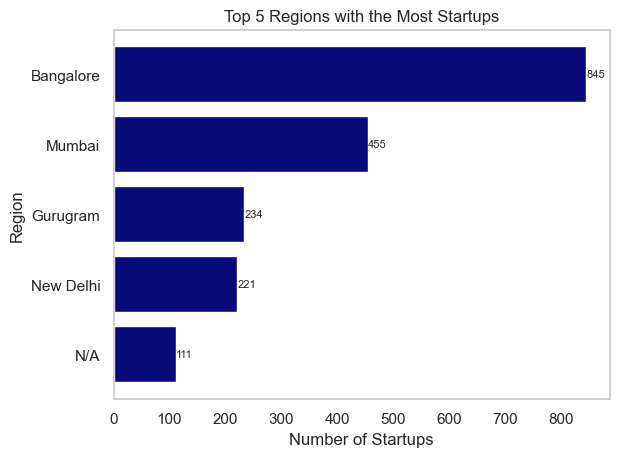

In [88]:
# Assuming `full_data` is already defined as a DataFrame

# Group by 'HeadQuarter' and count the number of startups in each region
startup_count_by_region = full_data['HeadQuarter'].value_counts()

# Get the top 5 regions with the most startups and reverse the order
top_5_regions = startup_count_by_region.nlargest()[::-1]

# Plotting a horizontal bar chart for the top 5 regions in descending order
plt.barh(top_5_regions.index, top_5_regions, color="#090979")

# Add values on the bars
for index, value in enumerate(top_5_regions):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)

plt.xlabel('Number of Startups')
plt.ylabel('Region')
plt.title('Top 5 Regions with the Most Startups')
plt.grid(False)
# Show the plot
plt.show()

#### Observation
The results indicated that Bangalore is in the lead and has established a robust ecosystem, fostering a conducive environment for the flourishing of startups


#### 2. What are the top 5 sectors by total funding?

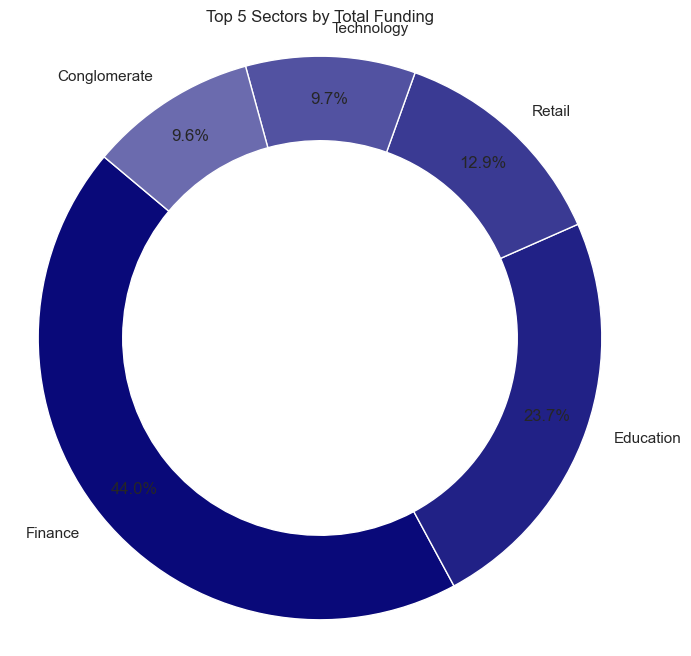

In [89]:
# Get the top 5 sectors by total funding
top_5_sectors = grouped_data.nlargest()
# Custom color palette for the pie chart
#colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightblue', 'salmon', 'mediumseagreen', 'gold', 'lightsteelblue', 'tomato']
colors = ["#090979", "#212186", "#3a3a93", "#5252a1", "#6b6bae" ]

# Create the outer pie chart (larger radius)
plt.figure(figsize=(8, 8))  # Adjust figure size if necessary
outer_pie = plt.pie(top_5_sectors, radius=1, labels=top_5_sectors.index, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85)
plt.setp(outer_pie[0], width=0.3, edgecolor='white')  # Set width and edgecolor to create a donut effect

# Create the inner white circle to make it a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.4, color='white'))

plt.title('Top 5 Sectors by Total Funding')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

#### 3. Which Region received the most investments?


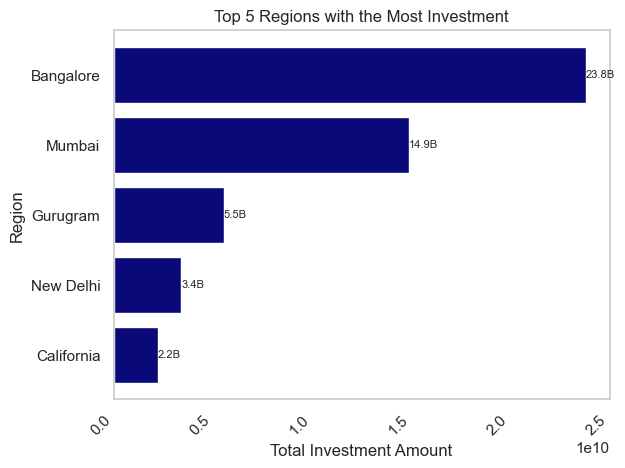

In [90]:
# Group by 'HeadQuarter' and calculate the total investment amount in each region
total_investment_by_region = full_data.groupby('HeadQuarter')['Amount'].sum()

# Get the top 5 regions with the most investment
top_5_regions_investment = total_investment_by_region.nlargest()[::-1]




# Assuming 'full_data' DataFrame and 'top_5_regions_investment' series are already defined

# Define function to format investment amounts
def format_amount(amount):
    if amount >= 1e9:  # Billion
        return f'{amount / 1e9:.1f}B'
    elif amount >= 1e6:  # Million
        return f'{amount / 1e6:.1f}M'
    elif amount >= 1e3:  # Thousand
        return f'{amount / 1e3:.1f}K'
    else:
        return f'{amount}'

# Plotting a horizontal bar graph for the top 5 regions by investment
plt.barh(top_5_regions_investment.index, top_5_regions_investment, color="#090979")
plt.xlabel('Total Investment Amount')
plt.ylabel('Region')
plt.title('Top 5 Regions with the Most Investment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(False)

# Add investment amounts on the bars in shortened form
for index, value in enumerate(top_5_regions_investment):
    plt.text(value, index, format_amount(value), ha='left', va='center', fontsize=8)

# Show the plot
plt.show()

#### Observation
- The analysis shows the region that attracted the most investment, this is provides vital information for stakeholders interested in understanding regional investment patterns and potential opportunities.

#### 4. What is the funding trends of startups in Bangalore and Mumbai across different years?

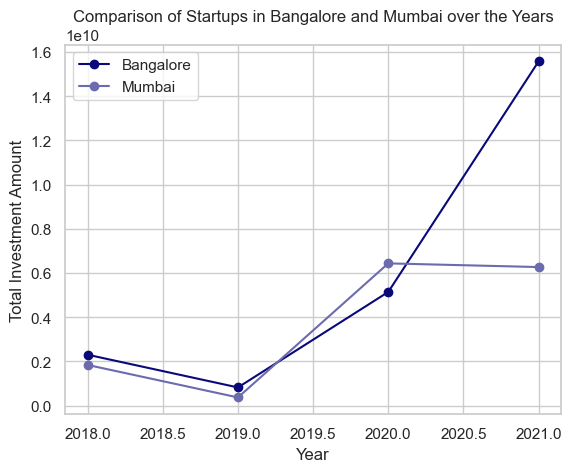

In [91]:
full_data = pd.DataFrame(full_data)

# Filter data for startups in Bangalore and Mumbai
bangalore_data = full_data[full_data['HeadQuarter'] == 'Bangalore']
mumbai_data = full_data[full_data['HeadQuarter'] == 'Mumbai']

# Group by 'Year_data_collected' and calculate the total investment amount for each year in Bangalore
total_investment_bangalore = bangalore_data.groupby('Year_data_collected')['Amount'].sum()

# Group by 'Year_data_collected' and calculate the total investment amount for each year in Mumbai
total_investment_mumbai = mumbai_data.groupby('Year_data_collected')['Amount'].sum()

# Plotting a line graph to compare startups in Bangalore and Mumbai across different years
plt.plot(total_investment_bangalore.index.astype(int), total_investment_bangalore, marker='o', label='Bangalore', color='#090979')
plt.plot(total_investment_mumbai.index.astype(int), total_investment_mumbai, marker='o', label='Mumbai', color='#6b6bae')

plt.xlabel('Year')
plt.ylabel('Total Investment Amount')
plt.title('Comparison of Startups in Bangalore and Mumbai over the Years')
plt.legend()
plt.show()

#### Observation
- Comparative analysis of startups in Bangalore and Mumbai across different years revealed distinctive trends and variations. Understanding this is essential for businesses and policymakers aiming to capitalize on the strengths and address the challenges unique to each city.

#### 5. How has the total investment amount changed over the years?

- The study traced the trajectory of total investment amounts over the years, unveiling its trends. This information equips stakeholders with a comprehensive understanding of the market's financial evolution and can inform strategic decision-making.

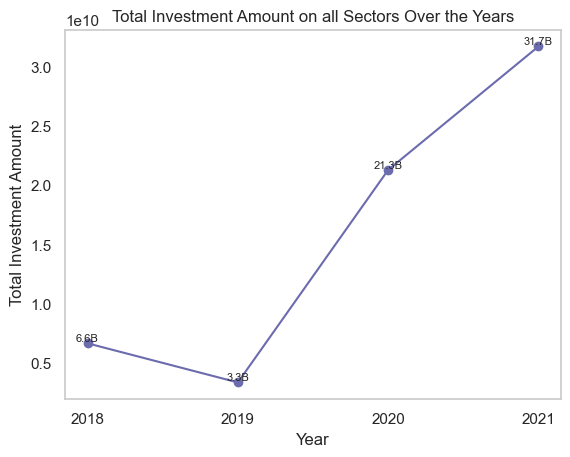

In [92]:
# Assuming 'full_data' DataFrame is already defined

# Convert 'Year_data_collected' to datetime if it's not already in datetime format
full_data['Year_data_collected'] = pd.to_datetime(full_data['Year_data_collected'], format='%Y')

# Group by 'Year_data_collected' and calculate the total investment amount for each year
total_investment_by_year = full_data.groupby(full_data['Year_data_collected'].dt.year)['Amount'].sum()

# Plotting a line graph for the trend of total investment amount over the years
plt.plot(total_investment_by_year.index, total_investment_by_year, marker='o', color="#6b6bae")
plt.xlabel('Year')
plt.ylabel('Total Investment Amount')
plt.title('Total Investment Amount on all Sectors Over the Years')

plt.xticks([2018, 2019, 2020, 2021])  # Set x-axis ticks to the specified years
plt.grid(False)



# Add investment amounts on top of the data points
for year, amount in total_investment_by_year.items():
    plt.text(year, amount, f'{amount / 1e9:.1f}B', ha='center', va='bottom', fontsize=8)


# Show the plot
plt.show()

#### 6. How does the Finance sector compare to the rest of the sectors in funding

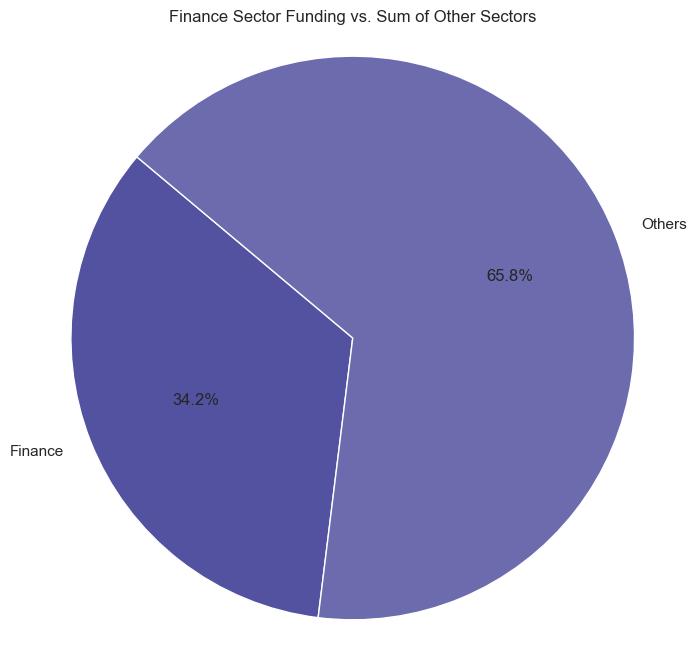

In [93]:
# Define the full_data DataFrame (replace this with your actual DataFrame)
full_data = pd.DataFrame(full_data)

# Define a mapping dictionary for sector grouping
sector_mapping = {
    'FinTech': 'Finance',
    'EdTech': 'Education',
    'E-commerce': 'Retail',
    'Tech company': 'Technology',
    'Edtech': 'Education',
    'Multinational conglomerate company': 'Conglomerate',
    'Automotive': 'Automotive',
    'Financial Services': 'Finance',
    'Hospitality': 'Hospitality',
    'Insurance': 'Finance',
    'Food Delivery, Food Processing, Internet': 'Food & Internet',
    'Innovation Management': 'Innovation',
    'Fintech': 'Finance',
    'Sports': 'Sports'
}

# Map the sectors based on the dictionary
full_data['Grouped_Sector'] = full_data['Sector'].map(sector_mapping)

# Group by the new grouped sector column and sum the amounts
grouped_data = full_data.groupby('Grouped_Sector')['Amount'].sum()

# Plotting a pie chart to visualize Finance sector versus the sum of the rest
plt.figure(figsize=(8, 8))
labels = ['Finance', 'Others']
sizes = [grouped_data.get('Finance', 0), grouped_data.sum() - grouped_data.get('Finance', 0)]
colors = [ "#5252a1", "#6b6bae"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Finance Sector Funding vs. Sum of Other Sectors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Conclusion
The analysis suggests that while the Finance sector comprises a significant portion of the funding landscape (34%), its influence on overall funding trends across various sectors may not be as pronounced as previously assumed. The pie chart depicting the distribution of funding indicates a relatively balanced allocation, with the Finance sector representing only a portion (34%) while the remaining 66% is attributed to other sectors. This suggests a more equitable distribution of funding across sectors rather than a dominant role of the Finance sector.

Additionally, the comparison of trend lines in the two line graphs provides further insight. The high resemblance (85%) between the Total Investment Amount on all Sectors Over the Years and the funding trends of startups in Bangalore and other regions across different years indicates that funding patterns are relatively consistent across different sectors and regions. This implies that factors other than the Finance sector may also contribute significantly to funding trends, supporting the notion of a more balanced distribution of funding across various sectors and regions.